# <font color="red"> <div align="center"> REGRESSION PROJECT  
    
## <div align="center"> Life Expectancy Data


## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Data Exploration
     * 4.1. Importing an External Data Frame
     * 4.2. Merging Two Data Frame in One
5.  Cleaning of Row Data 
6.  Filling of the Row Data 
7.  General Looking on Life Expectancy Values Based on Regions and Years
8.  Overview about Outliers 
     * 8.1 Winsorization
9.  Feature Engineering
     * 9.1 Getting PCA Values
     * 9.2 Getting PCA Values for all Elements by Switching Variables to Dummies*
10.  Building Models
     * 10.1 Building Model with All Numerical Variables
      * 10.1. a)Residual Distributions on the Model
      * 10.1. b)Jarque Bera Test
     * 10.2 Adding Polinomial Features
     * 10.3 Building Polinomial Regression Models
      * 10.3 a)Checking the Best Polinomial Degree
      * 10.3 b)Checking the Performance of Models within Polinomial Degree
     * 10.4 Building Ridge Regression Models
     * 10.5 Building Lasso Regression Models
     * 10.6 Building ElasticNet Regression Models
11. Evaluating the Model
12. Predicting with the Best Model
13. Conclusions

### 0. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings(action= "ignore")

In [2]:
from matplotlib import style
style.use('fivethirtyeight')

# <div align="center">  **1. Introduction**

### <font color="gray"> **Provided Information about The preparation of Row Data:**  The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset.

### <font color="gray">On initial visual inspection of the data showed some missing values. As the datasets were from WHO,  None of evident errors are found. It is approved by puplishers that missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file (final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors and Social factors.

### <font color="gray"> In order to generate our regression models, I preferred  to merged an external data set to check  values based on  regions, sub-regions and countries to have deeper view on data. It also helped me to filled missing values accurately by using 'Sub-Region' values.

### <font color="gray"> **The preparation on Observations before Machine Learning:** Missing values were filled by interpolate method firstly, but the rest was filled grouping by 'Sub-Region' and 'Year' columns. 

# <div align="center"> **2. The Aim of Analysis**

### <font color="gray"> This study aims to search for the elements which effects life expectancy by using statistical tools such as MSE, R squared, RMSE, ect. on different regression models.

# <div align="center">  **3. General Information of the Data**

<font color="gray">Country : Country
 
Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

# <div align="center"> **4. Data Exploration**

#### ***Getting Data***

In [3]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')

#### ***First 5 rows***

In [4]:
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### ***About data***

In [5]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

####  ***Looking null values***

In [6]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#### ***Checking for column names for further steps***

In [7]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### ***Manipulating column names for future steps***

In [8]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

#### ***Looking NAN values with heatmap***

In [9]:
total_missing_values = LifeExpectancyData.isnull().sum()
missing_values_per = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)

In [10]:
def null_cell(LifeExpectancyData):
    total_missing_values = LifeExpectancyData.isnull().sum()
    missing_values_per = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc'])
    null_values = null_values.sort_values('total_null', ascending=False)
    return null_values[null_values['total_null'] > 0]

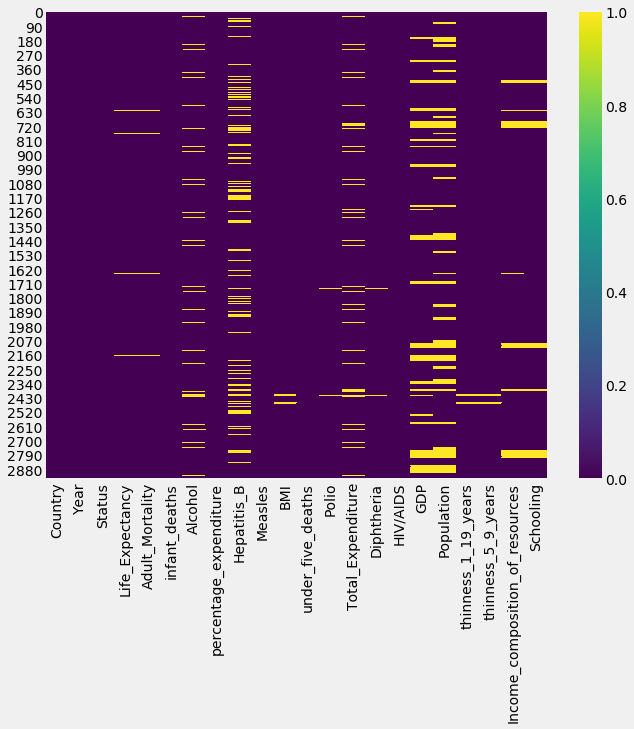

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(LifeExpectancyData.isnull(), cmap='viridis')

## **4.1. Importing an External Data Frame**

<font color="green"> ***Further steps requires extra tools to compare such as regions and sub regions. Lack of those information does not help us to group data on necessary areas. Therefore, I imported an external data frame with only neccessary columns.***

#### ***Getting new dataset***

In [12]:
regions = pd.read_csv('./data/all.csv')

#### ***Looking new dataset - first 5 rows***

In [13]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


#### ***Checking NULL values***

In [14]:
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

#### ***Last check on column names***

In [15]:
regions.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

## **4.2. Merging two data frame in one, LifeExpectancyData_merged, will help us to fill in accurately.**

#### ***Merging datasets***

In [16]:
LifeExpectancyData_merged = pd.merge(LifeExpectancyData, regions[['name', 'region', 'sub-region']],
                                     left_on='Country', right_on='name')

#### ***Looking at NAN values***

In [17]:
null_cell(LifeExpectancyData_merged)

,total_null,total_null_perc
Population,556,0.196745
Hepatitis_B,536,0.189667
GDP,352,0.124558
Total_Expenditure,204,0.072187
Alcohol,187,0.066171
Income_composition_of_resources,87,0.030786
Schooling,83,0.029370
BMI,34,0.012031
thinness_5_9_years,34,0.012031
thinness_1_19_years,34,0.012031


#### ***Checking merged dataset - first 5 rows***

In [18]:
LifeExpectancyData_merged.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Afghanistan,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Afghanistan,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Afghanistan,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Afghanistan,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Afghanistan,Asia,Southern Asia


# <div align="center"> **5. Cleaning of the Row Data**

#### <font color="green">***We have a lot of missing population values in many countries. However, having GDP values from population for each country can help us as well. We also have status (Developed or Developing) for each country. Therefore, I preferred to drop column from data frame.***

#### ***Dropping Population column***

In [19]:
LifeExpectancyData_merged.drop('Population', inplace=True, axis=1)

#### ***Looking at columns of the new merged dataset***

In [20]:
LifeExpectancyData_merged.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

#### ***Getting NAN values from index***

In [21]:
fill_list = (null_cell(LifeExpectancyData_merged)).index

# <div align="center"> **6. Filling of the Row Data**

#### ***Filling NAN values with interpolate method with both option as having values for some rows in each countries***

In [22]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

#### ***Checking NAN values after interpolate***

In [23]:
null_cell(df_interpolate)

,total_null,total_null_perc
GDP,309,0.109342
Hepatitis_B,144,0.050955
Income_composition_of_resources,87,0.030786
Schooling,83,0.029370
BMI,34,0.012031
thinness_5_9_years,34,0.012031
thinness_1_19_years,34,0.012031
Alcohol,17,0.006016
Total_Expenditure,16,0.005662
Life_Expectancy,10,0.003539


In [24]:
df_interpolate[df_interpolate['Adult_Mortality'].isna()]


,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,0.1,NaN,0.1,0.1,NaN,NaN,Cook Islands,Oceania,Polynesia
737,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,0.1,722.756650,2.7,2.6,0.721,12.7,Dominica,Americas,Latin America and the Caribbean
1618,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,0.1,3617.752354,0.1,0.1,NaN,0.0,Marshall Islands,Oceania,Micronesia
1683,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,0.1,NaN,NaN,NaN,NaN,NaN,Monaco,Europe,Western Europe
1780,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,0.1,136.183210,0.1,0.1,NaN,9.6,Nauru,Oceania,Micronesia
1877,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,0.1,NaN,0.1,0.1,NaN,NaN,Niue,Oceania,Polynesia
1926,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,0.1,1932.122370,0.1,0.1,0.779,14.2,Palau,Oceania,Micronesia
2103,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,0.1,NaN,3.7,3.6,0.749,13.4,Saint Kitts and Nevis,Americas,Latin America and the Caribbean
2152,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,0.1,NaN,NaN,NaN,NaN,15.1,San Marino,Europe,Southern Europe
2617,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,0.1,3542.135890,0.2,0.1,NaN,0.0,Tuvalu,Oceania,Polynesia


<font color="green">  ***Applying interpolate method on both direction with grouping by Country, does not help on missing values. It only helped to decrease number of missing values at once.
On those rows, there is no previous information for relevant countries. Thus, I used interpolte method with grouping by sub-region and Year.***

In [25]:
for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

#### ***Checking for NAN values***

In [26]:
null_cell(df_interpolate)

,total_null,total_null_perc


#### <font color="green"> ***Now data is ready for further steps.***

####  ***Getting numeric values for mathematical and statistical operations.***

In [27]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

#### ***Correlations Between All Variables.***

In [28]:
corr_matrix = LifeExpectancyData_num.corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]

In [29]:
corr_list

Index(['Schooling', 'Income_composition_of_resources', 'Adult_Mortality',
       'HIV/AIDS', 'BMI', 'Diphtheria', 'thinness_1_19_years',
       'thinness_5_9_years', 'Polio', 'GDP', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Total_Expenditure',
       'under_five_deaths', 'infant_deaths', 'Year', 'Measles'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

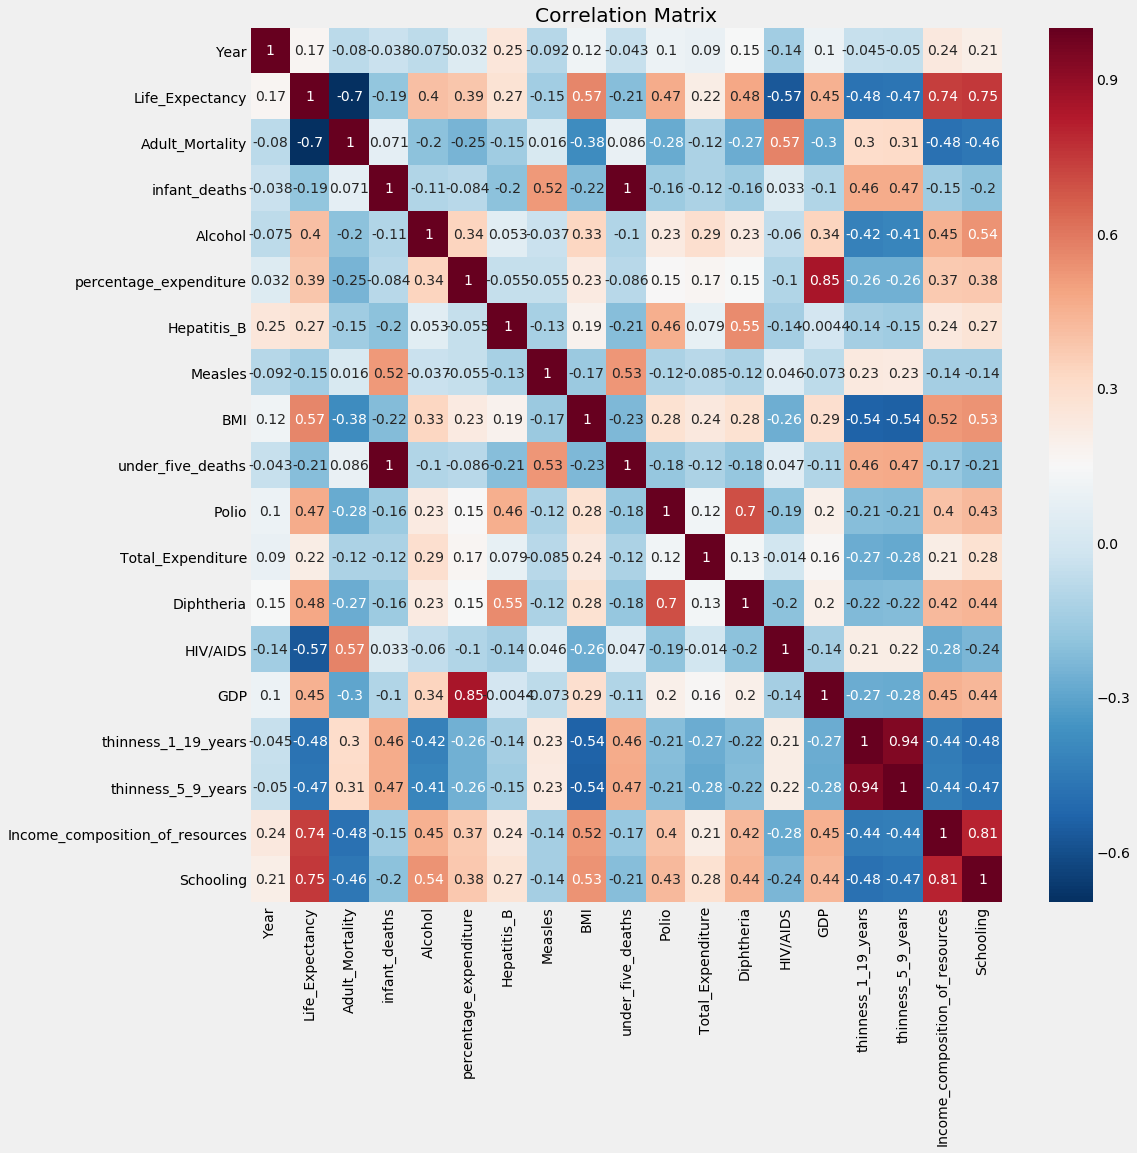

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Matrix')

<font color="green">   ***As we see above, 'Schooling', 'Income_composition_of_resources', and 'Adult_Mortality' have high correlation between Life Expectancy.***


***'HIV/AIDS', 'BMI', 'Diphtheria', 'thinness_1_19_years', 'thinness_5_9_years', 'Polio', 'GDP', and 'Alcohol' have medium correlation between Life Expectancy.***

***And the rest of our columns; 'percentage_expenditure', ’Hepatitis_B', 'Total_Expenditure', 'under_five_deaths', 'infant_deaths', 'Year', and 'Measles' have low correlation between Life Expectancy.***

#### ***Corellations between illnesses***

In [31]:
corr_matrix = LifeExpectancyData_num[['Hepatitis_B','Measles', 'Polio','Diphtheria','HIV/AIDS', 'thinness_1_19_years',
                                      'thinness_5_9_years','Life_Expectancy']].corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]

In [32]:
corr_list

Index(['HIV/AIDS', 'Diphtheria', 'thinness_1_19_years', 'thinness_5_9_years',
       'Polio', 'Hepatitis_B', 'Measles'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

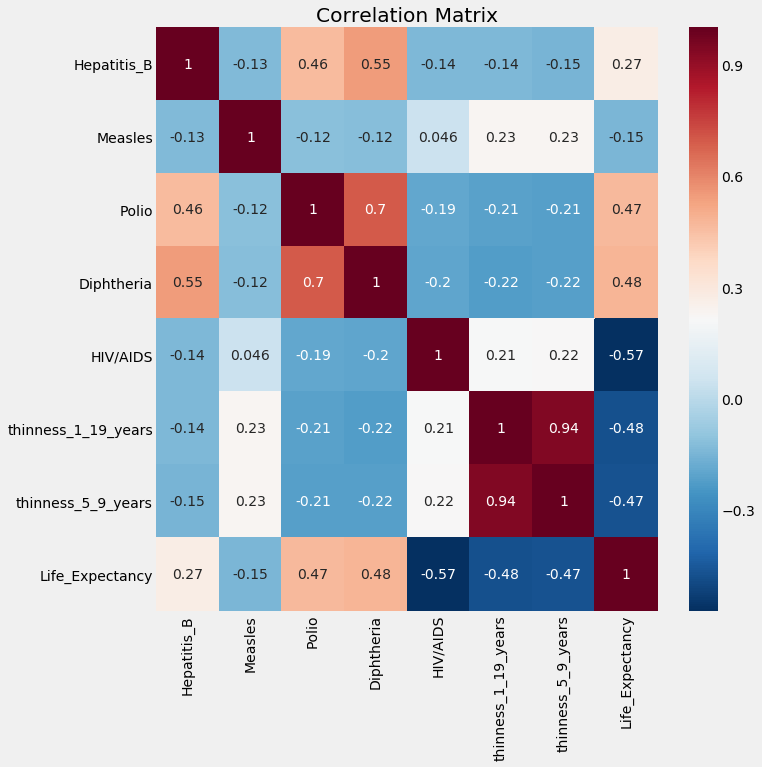

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Matrix')

###  <div align="center"> 7. General Looking on Life Expectancy Values Based on Regions and Years 

### General Looking on Life Expectancy in Years

Text(0.5, 1.0, 'General Looking on Life Expectancy in Years')

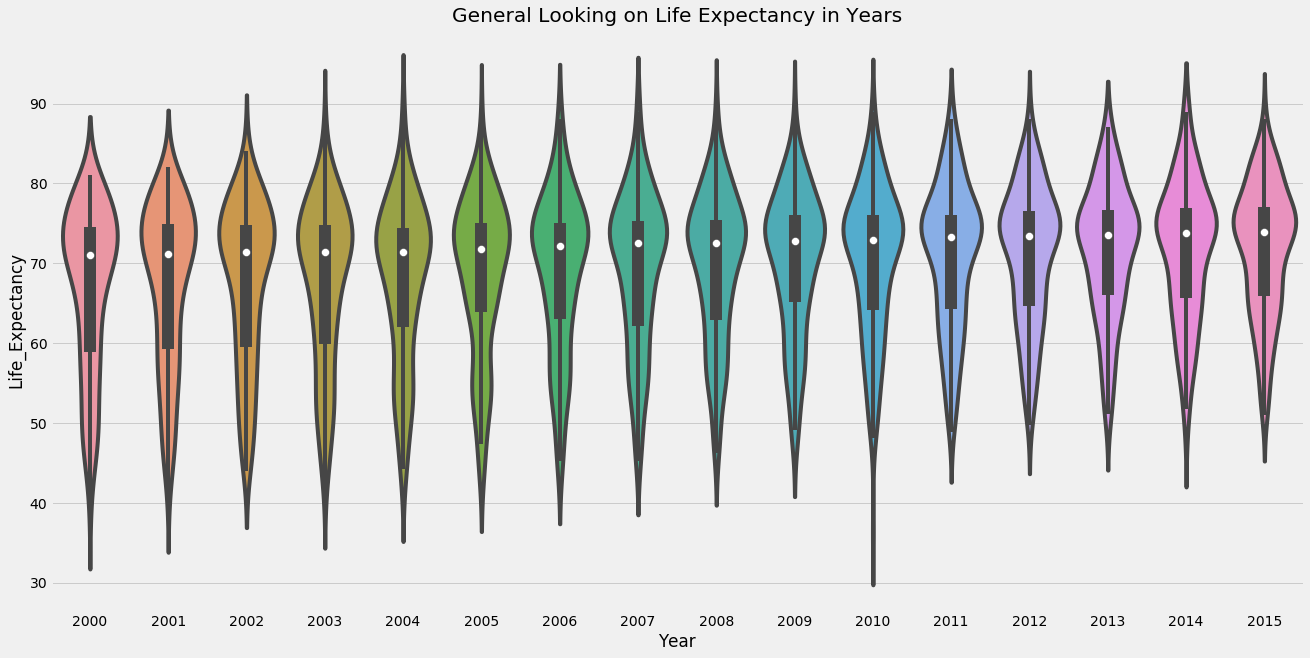

In [34]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df_interpolate["Year"], y=df_interpolate["Life_Expectancy"], data=df_interpolate)
plt.title('General Looking on Life Expectancy in Years')

<font color="green"> ***As we see on the violin graph, general Life Expectancy value is decreasing after 2010 till 2014. Let’s have a look more detailed.***

### **Life Expectancy Values in Years by Regions**

Text(0.5, 1.0, 'Life Expectancy Values in Years by Regions')

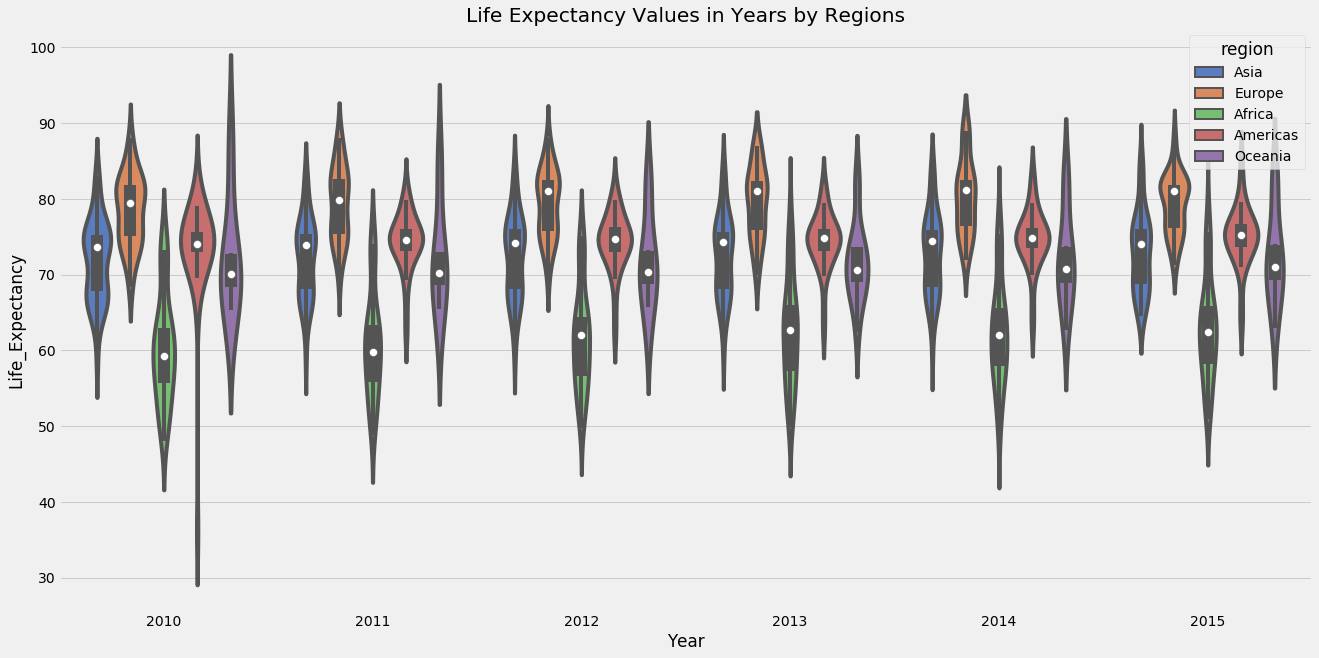

In [35]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df_interpolate.loc[df_interpolate['Year']>2009]["Year"], 
               y=df_interpolate["Life_Expectancy"],
               hue=df_interpolate["region"], 
               data=df_interpolate.loc[df_interpolate['Year']>2010], 
               palette="muted")

plt.title('Life Expectancy Values in Years by Regions')

### <font color="green"> ***People in Africa and Asia regions have a stable Life Expectancy in general while Ocenania and Europe regions have decreasing trend between 2010-2014.***

### General View in Life Expectancy by Grouping Countries with GDP Values Based on Regions

Text(0, 0.5, 'Alcohol')

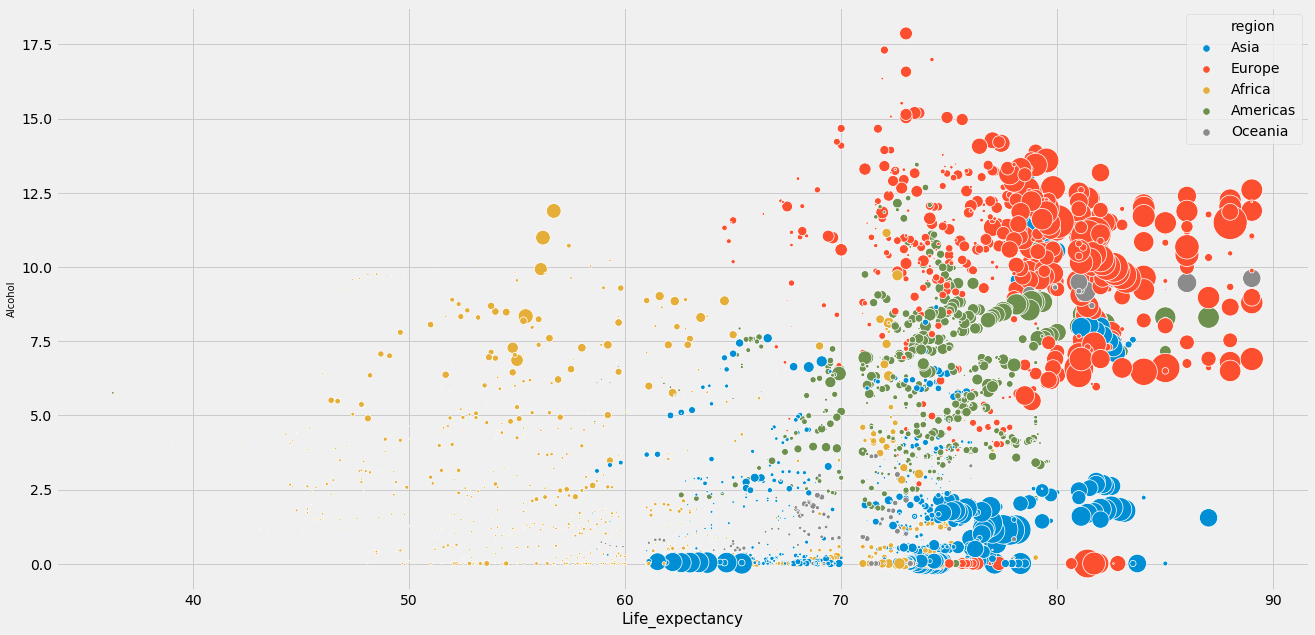

In [36]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df_interpolate['Life_Expectancy'], 
                y=df_interpolate['Alcohol'], 
                hue=df_interpolate['region'],
                data=df_interpolate, 
                s=df_interpolate.GDP/100);
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Alcohol', size =10)

# <div align="center"> 8. Overview about Outliers and Dealing with Them

In [37]:
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.figsize'] = (8,5.5)

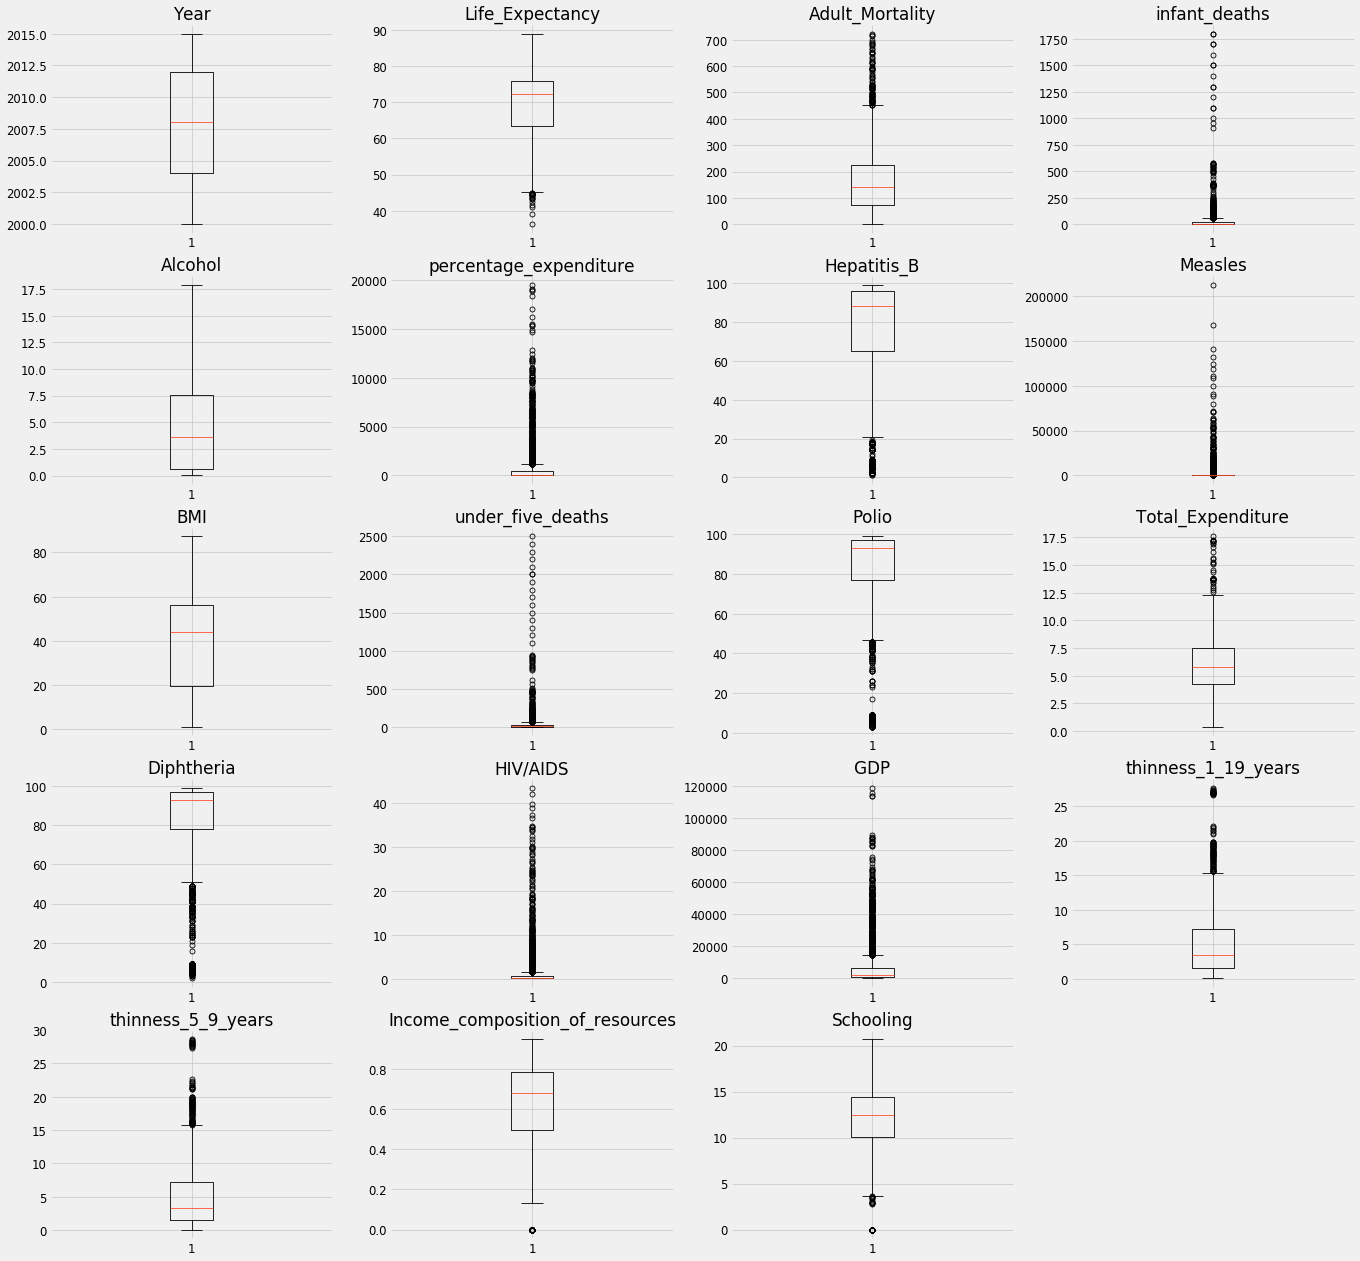

In [38]:
outliers_by_nineteen_variables = ['Year', 'Life_Expectancy','Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure',
                                    'Hepatitis_B','Measles', 'BMI',
                                    'under_five_deaths', 'Polio', 'Total_Expenditure','Diphtheria', 'HIV/AIDS', 'GDP',
                                    'thinness_1_19_years', 'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling'] 
plt.figure(figsize=(25,25))

for i in range(0,19):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_interpolate[outliers_by_nineteen_variables[i]])
    plt.title(outliers_by_nineteen_variables[i])

##  **8.1 Winsorization**

In [39]:
from scipy.stats.mstats import winsorize

#### ***Finding best limit for Winsorize for Each Variables***

In [40]:
def winsor(x, multiplier=3): #grafikteki 3 std spya girmis olmasi
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None 

In [41]:
#An example to get limit value for winsorization
limit= winsor(df_interpolate['infant_deaths'])
print(limit)

0.018000000000000002


In [42]:
df_interpolate["Adult_Mortality"]        = winsorize(df_interpolate["Adult_Mortality"], (0, 0.018))
df_interpolate["infant_deaths"]          = winsorize(df_interpolate["infant_deaths"], (0, 0.018))
df_interpolate["percentage_expenditure"] = winsorize(df_interpolate["percentage_expenditure"], (0, 0.036))
df_interpolate["Hepatitis_B"]            = winsorize(df_interpolate["Hepatitis_B"], (0,0.001))
df_interpolate["Measles"]                = winsorize(df_interpolate["Measles"], (0, 0.018))
df_interpolate["under_five_deaths"]      = winsorize(df_interpolate["under_five_deaths"], (0, 0.013))
df_interpolate["Polio"]                  = winsorize(df_interpolate["Polio"], (0, 0.001))
df_interpolate["Total_Expenditure"]      = winsorize(df_interpolate["Total_Expenditure"], (0, 0.011))
df_interpolate["Diphtheria"]             = winsorize(df_interpolate["Diphtheria"], (0, 0.001))
df_interpolate["HIV/AIDS"]               = winsorize(df_interpolate["HIV/AIDS"], (0, 0.030))
df_interpolate["GDP"]                    = winsorize(df_interpolate["GDP"], (0, 0.43))
df_interpolate["thinness_1_19_years"]    = winsorize(df_interpolate["thinness_1_19_years"], (0, 0.026))
df_interpolate["thinness_5_9_years"]     = winsorize(df_interpolate["thinness_5_9_years"], (0, 0.27))
df_interpolate["Income_composition_of_resources"] = winsorize(df_interpolate["Income_composition_of_resources"], (0, 0.001))
df_interpolate["Schooling"]              = winsorize(df_interpolate["Schooling"], (0, 0.001))


# <div align="center"> 9. Feature Engineering

## **9.1 PCA Results with only numeric variables**

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### ***Getting PCA Model***

In [44]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

In [45]:
LifeExpectancyData_num = LifeExpectancyData_num.dropna()

X = StandardScaler().fit_transform(LifeExpectancyData_num) #standardize the feature matrix

pca = PCA(n_components=0.90, whiten=True)

X_pca = pca.fit_transform(X)

#### ***Looking explained variance ratios***

In [46]:
print (pca.explained_variance_ratio_)

[0.36310594 0.10940099 0.09625412 0.06519236 0.05480543 0.0535069
 0.04063344 0.03140865 0.02810711 0.02744404 0.02611802 0.0242357 ]


#### ***Looking at results***

In [47]:
print('Original Number of Features', X.shape[1]) 
print('Reduced Number of Features',X_pca.shape[1])

Original Number of Features 19
Reduced Number of Features 12


In [48]:
#Creating a scaler object
sc = StandardScaler()

#fit the scaler to the features and transform
X_std = sc.fit_transform(X)

# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 12)

In [49]:
from sklearn.decomposition import PCA
from sklearn import decomposition, datasets

In [50]:
#Creating a PCA object with 12 components as a parameter
pca = decomposition.PCA(n_components=12) 
# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 12)

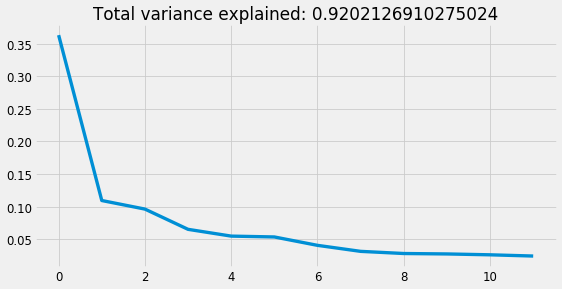

In [51]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

### <font color="green"> At the further steps, I will search for the best model based on number of variables. This PCS formula above is just an example to get results quickly. I would rather check the best model with MSE and another related values on different regression models in this project. 

## **9.2 Getting PCA Values for all Elements by Switching Variables to Dummies**

In [52]:
df_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 24 columns):
Country                            2826 non-null object
Year                               2826 non-null int64
Status                             2826 non-null object
Life_Expectancy                    2826 non-null float64
Adult_Mortality                    2826 non-null float64
infant_deaths                      2826 non-null int64
Alcohol                            2826 non-null float64
percentage_expenditure             2826 non-null float64
Hepatitis_B                        2826 non-null float64
Measles                            2826 non-null int64
BMI                                2826 non-null float64
under_five_deaths                  2826 non-null int64
Polio                              2826 non-null float64
Total_Expenditure                  2826 non-null float64
Diphtheria                         2826 non-null float64
HIV/AIDS                           2826 non-null

In [53]:
df_dummies = pd.get_dummies(df_interpolate)
df_dummies.head()

,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,...,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_Polynesia,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,1,0,0,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,1,0,0,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,1,0,0,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,1,0,0,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,1,0,0,0,0


###  PCA Results with all features with dummies

In [54]:
df_dummies = df_dummies.dropna()

X = StandardScaler().fit_transform(df_dummies)#standardize the feature matrix

pca = PCA(n_components=0.95, whiten=True)

X_pca = pca.fit_transform(X)

In [55]:
print('Original Number of Features', X.shape[1]) 
print('Reduced Number of Features',X_pca.shape[1])

Original Number of Features 415
Reduced Number of Features 178


In [56]:
#Creating a scaler object
sc = StandardScaler()

#fit the scaler to the features and transform
X_std = sc.fit_transform(X)

In [57]:
#Creating a PCA object with 178 components as a parameter
pca = decomposition.PCA(n_components=178) 
# Fit the PCA and transform the data
X_std_pca = pca.fit_transform(X_std)

# View the new feature data's shape
X_std_pca.shape

(2826, 178)

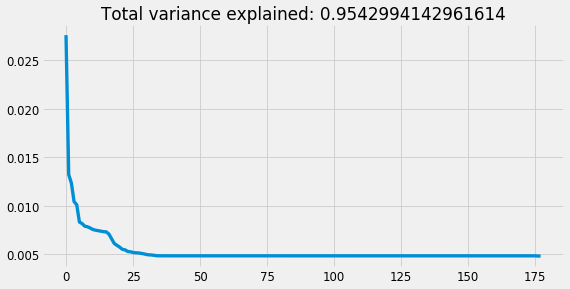

In [58]:
plt.figure(figsize = (10,5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Total variance explained: {}'.format(pca.explained_variance_ratio_.sum()))
plt.show()

PCA with 178 variables can explain of 95% of total variance.

# <div align="center"> 10. Building Regression Models

## **10.1 Building Model with All Numerical Variables**

In [59]:
y_allValues = LifeExpectancyData_num['Life_Expectancy']
X_allValues = LifeExpectancyData_num[corr_list]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_allValues, y_allValues, test_size = 0.2, random_state = 101)

print(" Observations in Training Group : {}".format(X_train.shape[0]))
print(" Observations in Test Group     : {}".format(X_test.shape[0]))

 Observations in Training Group : 2260
 Observations in Test Group     : 566


<font color="green"> ***We're splitting the data in two, so out of 100 rows, 80 rows will go into the training set, and 20 rows will go into the testing set.***

In [61]:
X_train = sm.add_constant(X_train)

Model_all = sm.OLS(y_train, X_train).fit()

Model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     649.0
Date:                Fri, 24 May 2019   Prob (F-statistic):               0.00
Time:                        15:44:28   Log-Likelihood:                -7024.7
No. Observations:                2260   AIC:                         1.407e+04
Df Residuals:                    2252   BIC:                         1.411e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  66.4036      0.543    122.392      0.000      65.340      67.468
HIV/AIDS               -1.5865      0.046    -34.229      0.000      -1.677      -1.496
Diphtheria              0.0684      0.007      9.646      0.000       0.055       0.082
thinness_1_19_years    -0.0220      0.051     -0.429      0.668      -0.123       0.079
thinness_5_9_years     -1.2742      0.087    -14.713      0.000      -1.444      -1.104
Polio                   0.0565      0.007      8.501      0.000       0.044       0.070
Hepatitis_B            -0.0025      0.005     -0.525      0.599      -0.012       0.007
Measles             -7.905e-05   2.33e-05     -3.387      0.001      -0.000   -3.33e-05
==============================================================================
Omnibus:                      142.192   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.162
Skew:                          -0.485   Prob(JB):                     1.92e-52
Kurtosis:                       4.260   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
pValue = Model_all.pvalues
significant_values = list(pValue[pValue<= 0.05].index)

### 10.1. a)Residual Distributions on the Model

In [63]:
from sklearn import linear_model

In [64]:
Model_all = linear_model.LinearRegression()
Model_all.fit(X_allValues, y_allValues)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
pred = Model_all.predict(X_allValues)
Residuals = y_allValues - pred

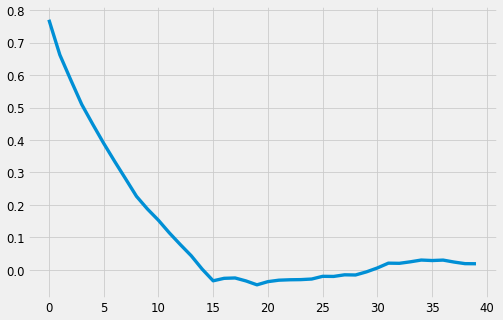

In [66]:
from statsmodels.tsa.stattools import acf

acf_data = acf(Residuals)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

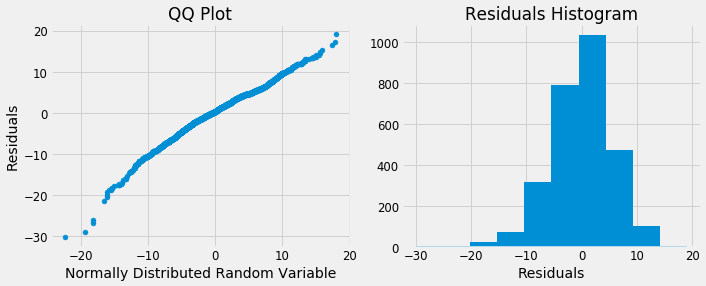

In [67]:
rand_nums = np.random.normal(np.mean(Residuals), np.std(Residuals), len(Residuals))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(Residuals))
plt.xlabel("Normally Distributed Random Variable")
plt.ylabel("Residuals")
plt.title("QQ Plot")

plt.subplot(1,2,2)
plt.hist(Residuals)
plt.xlabel("Residuals")
plt.title("Residuals Histogram")

plt.tight_layout()
plt.show()

### 10.1. b) Jarque Bera Test

In [68]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [69]:
jb_stats = jarque_bera(Residuals)
norm_stats = normaltest(Residuals)

print("Jarque-Bera test value : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test value      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test value : 306.11245587159914 ve p değeri : 0.0
Normal test value      : 178.69164396472786  ve p değeri : 0.000000000000000000000000000000


<font color="green"> ***Jarque Bera shows us that residuals distributed normally.***

## **10.2 Adding Polinomial Features**

In [70]:
df = LifeExpectancyData_num.drop(["Life_Expectancy", "Year"], axis=1)

In [71]:
df.shape

(2826, 17)

## **10.3 Building Polinomial Regression Models**

**10.3 a)Checking the Performance of Models within Polynomial  Degree**

In [72]:
from sklearn.preprocessing import PolynomialFeatures 

In [73]:
def polynomial(df,pol):
    poly = PolynomialFeatures(pol)
    poly_array = poly.fit_transform(df.drop('Life_Expectancy', axis=1))
    df_dropped = df.drop('Life_Expectancy', axis=1)
    df_pol = pd.DataFrame(poly_array, columns= poly.get_feature_names(df_dropped.columns))
    df_pol = pd.concat([df_pol, df['Life_Expectancy']], axis=1)
    Feature_list = df_pol.corr()['Life_Expectancy'].abs().sort_values(ascending = False)[1:].index
    return pd.concat([df_pol[Feature_list], df['Life_Expectancy']], axis=1)

In [74]:
df_pol1 = polynomial(LifeExpectancyData_num,1)

In [75]:
def model_pol(df,pol):
    y = df['Life_Expectancy']
    Feature_list = Feature_list = df.columns[:500] #Having overfitting after 200 variables I prefer to limit until 500
    MSE_list_test=[]
    R_list=[]
    number_of_variables=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]
    for variable in range(1,len(Feature_list)-1, pol**pol*2):
        selected_features =  Feature_list[:(-1*variable)]
        X_poly=df[selected_features]
    
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
        
        model_poly = LinearRegression()
        results = model_poly.fit(X_train, y_train)
        y_pred  = model_poly.predict(X_test)
        y_pred_train = model_poly.predict(X_train)

        MSE_list_test.append(mse(y_test, y_pred))
        MSE_train_list.append(mse(y_train, y_pred_train))

        R_list.append(model_poly.score(X_test, y_test))

        R_train_list.append(model_poly.score(X_train, y_train))


        number_of_variables.append(len(selected_features))

        MAE_list.append(mean_absolute_error(y_test, y_pred))

        RMSE_list.append(rmse(y_test, y_pred))

        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
    model_means = list(zip(number_of_variables, R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    poly_means = pd.DataFrame(model_means, columns= ['number_of_variables','R_list','R_train_list',
                                                            'MSE_list_test','MSE_train_list','MAE_list', 'RMSE_list', 'MAPE_list'])
    
    return poly_means

In [76]:
df_poly_transform1 = polynomial(LifeExpectancyData_num,1)
df_pol1 = model_pol(df_poly_transform1,2)

In [77]:
df_poly_transform2 = polynomial(LifeExpectancyData_num,2)
df_pol2 = model_pol(df_poly_transform2,2)

In [78]:
#%%time #checking total time of process in Pyhton
df_poly_transform3 = polynomial(LifeExpectancyData_num,3)
df_pol3 = model_pol(df_poly_transform3,3)

#### Displaying 3 polynomial models with data frames 

In [79]:
display(df_pol1.sort_values(by='MSE_list_test').head())
display(df_pol2.sort_values(by='MSE_list_test').head())
display(df_pol3.sort_values(by='MSE_list_test').head())

,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list
0,19,0.855995,0.847706,13.429793,13.376066,2.682385,3.664668,4.120825
1,11,0.844826,0.840478,14.471388,14.010917,2.777485,3.804128,4.265693
2,3,0.744505,0.731908,23.827271,23.546771,3.311920,4.881319,5.209674


,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list
0,190,0.935066,0.944217,6.055676,4.899471,1.753252,2.460828,2.614138
2,174,0.934790,0.942967,6.081471,5.009262,1.745397,2.466064,2.599625
1,182,0.933839,0.943730,6.170144,4.942214,1.771276,2.483977,2.641895
6,142,0.933818,0.937687,6.172096,5.473014,1.769647,2.484370,2.627945
7,134,0.933797,0.937188,6.174024,5.516844,1.774125,2.484758,2.634316


,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list
5,229,0.928644,0.943046,6.654642,5.002278,1.806150,2.579659,2.687244
2,391,0.926028,0.955481,6.898609,3.910105,1.759264,2.626520,2.626036
3,337,0.921070,0.951194,7.360992,4.286657,1.868837,2.713115,2.815199
4,283,0.917930,0.946987,7.653788,4.656160,1.911508,2.766548,2.870617
6,175,0.915384,0.927940,7.891225,6.329054,1.998956,2.809132,3.046112


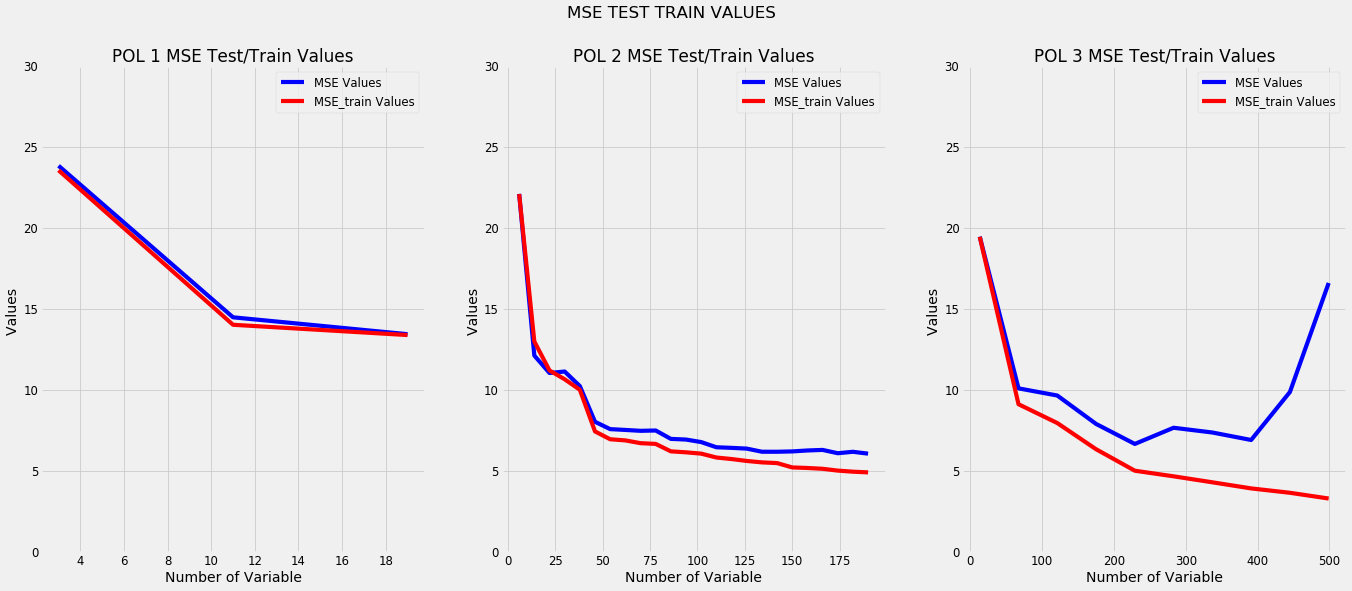

In [80]:
plt.figure(1, figsize = (25,10))
plt.suptitle('MSE TEST TRAIN VALUES', size=20)



plt.subplot(1,3,1)
plt.plot(df_pol1.number_of_variables,df_pol1.MSE_list_test, label  = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol1.number_of_variables,df_pol1.MSE_train_list, label = 'MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values ')
plt.title('POL 1 MSE Test/Train Values')
plt.ylim(0,30)
plt.legend()

plt.subplot(1,3,2)
plt.plot(df_pol2.number_of_variables, df_pol2.MSE_list_test, label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol2.number_of_variables, df_pol2.MSE_train_list,label = 'MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values ')
plt.ylim(0,30)
plt.title('POL 2 MSE Test/Train Values')
plt.legend()

plt.subplot(1,3,3)
plt.plot(df_pol3.number_of_variables, df_pol3.MSE_list_test, label = 'MSE Values', color='blue', linewidth=5)
plt.plot(df_pol3.number_of_variables, df_pol3.MSE_train_list,label = 'MSE_train Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values ')
plt.ylim(0,30)
plt.title('POL 3 MSE Test/Train Values')


plt.subplots_adjust()
plt.legend()
plt.show()



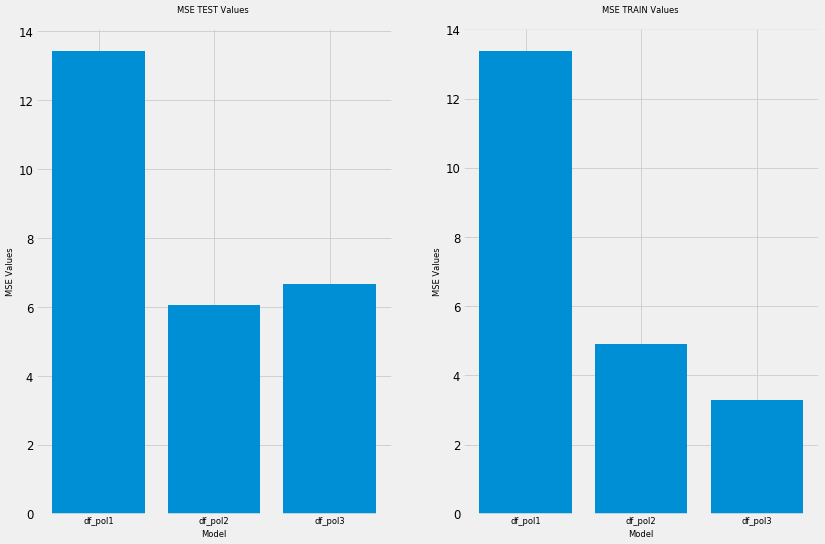

In [81]:
plt.figure(figsize=(15,10))
objects = ('df_pol1', 'df_pol2', 'df_pol3')

y_pos = np.arange(len(objects)) 
performance  =[df_pol1.MSE_list_test.min() ,df_pol2.MSE_list_test.min(), df_pol3.MSE_list_test.min()]
performance2 =[df_pol1.MSE_train_list.min(), df_pol2.MSE_train_list.min(), df_pol3.MSE_train_list.min()]

plt.subplot(121)
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,size=10)
plt.xlabel('Model',size=10)
plt.ylabel('MSE Values',size=10)
plt.title('MSE TEST Values \n', fontsize=10)

plt.subplot(122)
plt.bar(y_pos, performance2, align='center')
plt.xticks(y_pos, objects,size=10)
plt.title('MSE TRAIN Values \n', size = 10)


plt.xlabel('Model',size=10)
plt.ylabel('MSE Values',size=10)

plt.show()



# **Visualization the three category based models**

In [82]:
df = LifeExpectancyData_num.drop(["Life_Expectancy", "Year"], axis=1)

In [83]:
poly = PolynomialFeatures(2)
poly_array = poly.fit_transform(df)

In [84]:
df_poly2 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

In [85]:
y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly2

X_train_pol2, X_test_pol2, y_train_pol2, y_test_pol2 = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_2 = sm.OLS(y_train_pol2, X_train_pol2).fit()
y_preds_pol2 = poly_model_2.predict(X_test_pol2)
y_preds_train_pol2 = poly_model_2.predict(X_train_pol2)

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


In [86]:
poly = PolynomialFeatures(3)
poly_array = poly.fit_transform(df)
df_poly3 = pd.DataFrame(poly_array, columns= poly.get_feature_names())

y = LifeExpectancyData_num['Life_Expectancy']
X = df_poly3

X_train_pol3, X_test_pol3, y_train_pol3, y_test_pol3 = train_test_split(X, y, test_size = 0.2, random_state = 101)

print("Observations in Train Group : {}".format(X_train.shape[0]))
print("Observations in Test Group  : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

poly_model_3 = sm.OLS(y_train_pol3, X_train_pol3).fit()
y_preds_pol3 = poly_model_3.predict(X_test_pol3)
y_preds_train_pol3 = poly_model_3.predict(X_train_pol3)

Observations in Train Group : 2260
Observations in Test Group  : 566


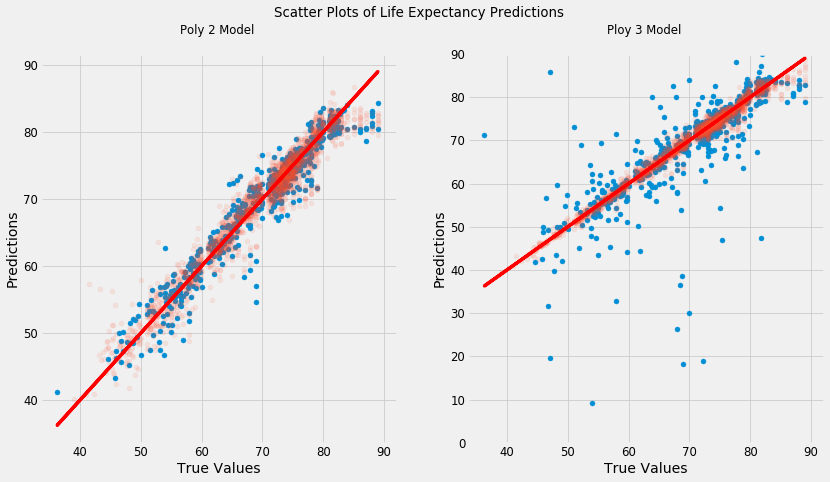

In [87]:
#ilki satir ikincisi sutun 3. yernumarasi

plt.figure(figsize=(15,8))
plt.suptitle('Scatter Plots of Life Expectancy Predictions', size = 16)

plt.subplot(1,2,1)
plt.title('Poly 2 Model \n', size = 14)
plt.scatter(y_test_pol2, y_preds_pol2 )
plt.scatter(y_train_pol2, y_preds_train_pol2,alpha=0.10)
plt.plot(y_test_pol2, y_test_pol2, color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1,2,2)
plt.title('Ploy 3 Model \n', size = 14)
plt.scatter(y_test_pol3, y_preds_pol3)
plt.scatter(y_train_pol3, y_preds_train_pol3,alpha=0.10)
plt.plot(y_test_pol3, y_test_pol3, color="red")
plt.ylim(0,90)
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplots_adjust()
plt.show()

<font color="green"> There are two critical characteristics of estimators to be considered: the bias and the variance. The bias is the difference between the true population parameter and the expected estimator.
It measures the accuracy of the estimates. Variance, on the other hand, measures the spread, or uncertainty, in these estimates. 

<font color="green"> So, setting λ to 0 is the same as using the OLS, while the larger its value, the stronger is the coefficients' size penalized
as λ becomes larger, the variance decreases, and the bias increases.
    
A more traditional approach would be to choose λ such that some information criterion,Akaike or Bayesian(AIC or BIC), is the smallest. A more machine learning-like approach is to perform cross-validation and select the value of λ that minimizes the cross-validated sum of squared residuals.

As we see on scatter plots, True values of Poly 2 model are distributed better than Poly 3 Model on test and train group. Poly 3 Model is not enough to explain some of higher values. 

# <div align="center">  10.4 Building Ridge Regression Models

#### <font color="green">While Least Squares determines values for the parameters in an equation, it minimizes the sum of the squared residuals. On the other hand, Ridge Regression minimizes the sum of the squared residuals plus lambda and the slope of the regression line.

#### <font color="green"> As having mostly parameters important for my prediction, I am willing to use Ridge Model as well to keep all of components in my model. 

In [88]:
from sklearn.linear_model import Ridge

In [89]:
def Ridge_model(df,pol, alpha, col=None):

    y = df['Life_Expectancy']
    Feature_list = df.columns[:500]
    
    MSE_list_test=[]
    R_list=[]
    number_of_variables=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]
    model_list=[]
    feature_list=[]
    
    for variable in range(1,len(Feature_list)-1, pol**pol*2):
        selected_features =  Feature_list[:(-1*variable)]
        X_poly=df[selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
                
        model_poly = Ridge(alpha= alpha) 
        model_poly.fit(X_train, y_train)
        results = model_poly.fit(X_train, y_train)
               
        y_pred  = model_poly.predict(X_test)
        
        y_pred_train = model_poly.predict(X_train)
      
        MSE_list_test.append(mse(y_test, y_pred))
        
        MSE_train_list.append(mse(y_train, y_pred_train))
        R_list.append(model_poly.score(X_test, y_test))
        R_train_list.append(model_poly.score(X_train, y_train))
        number_of_variables.append(len(selected_features))
        MAE_list.append(mean_absolute_error(y_test, y_pred))
        
        RMSE_list.append(rmse(y_test, y_pred))
        
        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        model_list.append(model_poly)
        feature_list.append(selected_features)
        
        
    
        
        
    model_means = list(zip(number_of_variables, R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list,model_list,feature_list))
    
    poly_means = pd.DataFrame(model_means, columns= ['number_of_variables', 'R_list','R_train_list',
                                                     'MSE_list_test','MSE_train_list','MAE_list','RMSE_list','MAPE_list','model_list', 'feature_list'])
    
    
    return poly_means, (y_pred,y_pred_train, X_train,y_train, X_test, y_test, MSE_list_test,MSE_train_list)

In [90]:
%%time
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    df, _  = Ridge_model(df_poly_transform2,2,alpha)
    print(alpha, df.MSE_list_test.min())

1e-06 6.055809535404965
1e-05 6.056840393632755
0.0001 6.060886367796813
0.001 6.065815316677079
0.01 6.09398633152686
1 6.619721177267344
10 7.250098600011812
100 7.429979345026244
1000 7.457390631500154
Wall time: 3.33 s


In [91]:
#The Best Model option with minimum MSE_test Value on Alpha 10-⁵ and polynomial 2nd degree.

df_Ridge_alpha_pol2, degerler1_2 = Ridge_model(df_poly_transform2,2,0.000001)

In [92]:
df_Ridge_alpha_pol2.head()

,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list,model_list,feature_list
0,190,0.935065,0.944217,6.055810,4.899471,1.753276,2.460855,2.614171,"Ridge(alpha=1e-06, copy_X=True, fit_intercept=...","Index(['Income_composition_of_resources^2', ..."
1,182,0.933838,0.943730,6.170252,4.942215,1.771295,2.483999,2.641923,"Ridge(alpha=1e-06, copy_X=True, fit_intercept=...","Index(['Income_composition_of_resources^2', ..."
2,174,0.934789,0.942967,6.081577,5.009262,1.745415,2.466085,2.599651,"Ridge(alpha=1e-06, copy_X=True, fit_intercept=...","Index(['Income_composition_of_resources^2', ..."
3,166,0.932599,0.941692,6.285807,5.121218,1.775361,2.507151,2.642316,"Ridge(alpha=1e-06, copy_X=True, fit_intercept=...","Index(['Income_composition_of_resources^2', ..."
4,158,0.932964,0.941125,6.251754,5.171051,1.770860,2.500351,2.634432,"Ridge(alpha=1e-06, copy_X=True, fit_intercept=...","Index(['Income_composition_of_resources^2', ..."


In [93]:
%%time
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    df, _  = Ridge_model(df_poly_transform3,3,alpha)
    print(alpha, df.MSE_list_test.min())

1e-06 6.572764161080212
1e-05 6.56260371531839
0.0001 6.554657634362831
0.001 6.576951316493493
0.01 6.6410997047102205
1 6.590386655453036
10 6.516874381084913
100 6.510624502758026
1000 6.590306866541263
Wall time: 3.53 s


In [94]:
#The Best Model option with minimum MSE_test Value on Alpha 10³ and polynomial 3rd degree.
df_Ridge_alpha_pol3, degerler1_3 = Ridge_model(df_poly_transform3,3,1000)

In [95]:
df_Ridge_alpha_pol3.head()

,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list,model_list,feature_list
0,499,0.813805,0.959419,17.364417,3.564296,1.979250,4.167063,2.939116,"Ridge(alpha=1000, copy_X=True, fit_intercept=T...","Index(['Income_composition_of_resources^3', ..."
1,445,0.894340,0.956528,9.853777,3.818168,1.872628,3.139073,2.774738,"Ridge(alpha=1000, copy_X=True, fit_intercept=T...","Index(['Income_composition_of_resources^3', ..."
2,391,0.929334,0.952559,6.590307,4.166776,1.764527,2.567159,2.649939,"Ridge(alpha=1000, copy_X=True, fit_intercept=T...","Index(['Income_composition_of_resources^3', ..."
3,337,0.915116,0.948630,7.916270,4.511909,1.895875,2.813587,2.882682,"Ridge(alpha=1000, copy_X=True, fit_intercept=T...","Index(['Income_composition_of_resources^3', ..."
4,283,0.924994,0.944596,6.995050,4.866160,1.881528,2.644816,2.822027,"Ridge(alpha=1000, copy_X=True, fit_intercept=T...","Index(['Income_composition_of_resources^3', ..."


#### <font color="green"> 2nd polynomial degree gives less R squared values while MSE is getting higher.

In [96]:
MSE_list_test_alpha_pol2  = df_Ridge_alpha_pol2['MSE_list_test']
MSE_train_test_alpha_pol2 = df_Ridge_alpha_pol2['MSE_train_list']
MSE_list_test_alpha_pol3  = df_Ridge_alpha_pol3['MSE_list_test']
MSE_train_test_alpha_pol3 = df_Ridge_alpha_pol3['MSE_train_list']

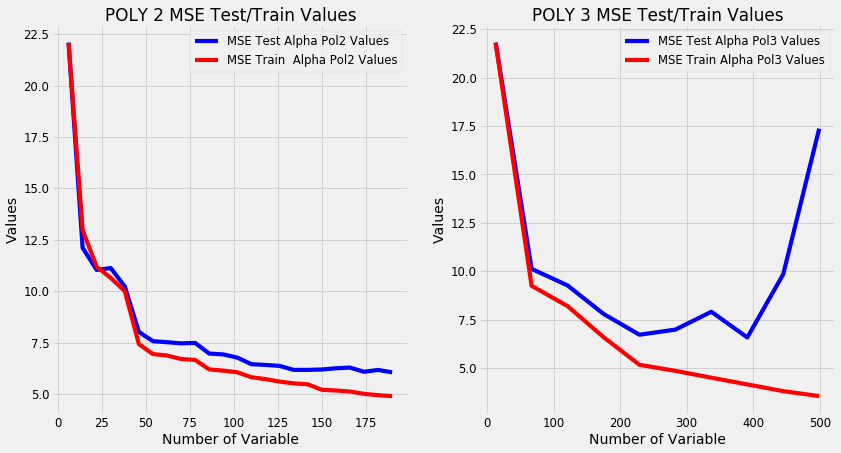

In [97]:
plt.figure(1, figsize = (15,8))

plt.subplot(1,2,1)
plt.plot(df_Ridge_alpha_pol2.number_of_variables, MSE_list_test_alpha_pol2,label  = 'MSE Test Alpha Pol2 Values', color='blue', linewidth=5)
plt.plot(df_Ridge_alpha_pol2.number_of_variables, MSE_train_test_alpha_pol2,label = 'MSE Train  Alpha Pol2 Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POLY 2 MSE Test/Train Values')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_Ridge_alpha_pol3.number_of_variables,MSE_list_test_alpha_pol3,label  = 'MSE Test Alpha Pol3 Values', color='blue', linewidth=5)
plt.plot(df_Ridge_alpha_pol3.number_of_variables, MSE_train_test_alpha_pol3,label = 'MSE Train Alpha Pol3 Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POLY 3 MSE Test/Train Values')


plt.subplots_adjust()
plt.legend()
plt.show()

#### <font color="green"> While having the same trend until 125th variable on the Poly 2 MSE results, Poly 3 MSE results shows us that after the 200th variable trend is not good any more. 
    
#### <font color="green"> Because having the low MSE value, I will continue with 2nd polynomial degree ridge Model. Later on, we also compare R squared values as well


# 10.5 Building Lasso Regression Models

#### <font color="green"> While Ridge Regression minimizes the sum of the squared residuals plus lambda and squaring the slope of the regression line, Lasso Regression minimizes the sum of the squared residuals, plus lambda and absolute value of slope of the regression line.
    
#### <font color="green">In contrast, Ridge shrink the parameters by keeping all of them, Lasso Regression eliminates and creates a simpler model to explain. Therefore, I would like to have results of this model as well to have a wide range of elements for my prediction.

In [98]:
from sklearn.linear_model import Lasso

In [99]:
def Lasso_model(df,pol, alpha):

    y = df['Life_Expectancy']
    Feature_list = df.columns[:500]
    
    MSE_list_test=[]
    R_list=[]
    number_of_variables=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]
    
    for variable in range(1,len(Feature_list)-1, pol**pol*2):
        selected_features =  Feature_list[:(-1*variable)]
        X_poly=df[selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
                
        model_poly = Lasso(alpha= alpha) 
        model_poly.fit(X_train, y_train)
        results = model_poly.fit(X_train, y_train)
               
        y_pred  = model_poly.predict(X_test)
        
        y_pred_train = model_poly.predict(X_train)
      
        MSE_list_test.append(mse(y_test, y_pred))
        
        MSE_train_list.append(mse(y_train, y_pred_train))
        R_list.append(model_poly.score(X_test, y_test))
        R_train_list.append(model_poly.score(X_train, y_train))
        number_of_variables.append(len(selected_features))
        MAE_list.append(mean_absolute_error(y_test, y_pred))
        
        RMSE_list.append(rmse(y_test, y_pred))
        
        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
        
    model_means = list(zip(number_of_variables, R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    
    poly_means = pd.DataFrame(model_means, columns= ['number_of_variables', 'R_list','R_train_list','MSE_list_test','MSE_train_list','MAE_list','RMSE_list','MAPE_list'])
    
    
    return poly_means, (y_pred,y_pred_train, X_train,y_train, X_test, y_test, model_poly, MSE_list_test,MSE_train_list)

In [100]:
%%time
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    df, _  = Lasso_model(df_poly_transform2,2,alpha)
    print(alpha, df.MSE_list_test.min())

1e-06 6.203610412207827
1e-05 6.203982517053942
0.0001 6.20425860316911
0.001 6.208015678489643
0.01 6.535600736058275
1 7.279844091909073
10 7.709999892949567
100 8.222476945520711
1000 12.118266732650007
Wall time: 1min 7s


In [101]:
#The Best Model option with minimum MSE_test Value on Alpha 10-⁵ and polynomial 2 degree

df_Lasso_alpha_pol2, degerler1_2 = Lasso_model(df_poly_transform2,2,0.000001)

In [102]:
df_Lasso_alpha_pol2.head()

,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list
0,190,0.933480,0.939321,6.203610,5.329515,1.766733,2.490705,2.639792
1,182,0.931613,0.938703,6.377727,5.383765,1.785728,2.525416,2.671431
2,174,0.932099,0.938139,6.332419,5.433269,1.776251,2.516430,2.654663
3,166,0.931817,0.937246,6.358680,5.511713,1.790922,2.521642,2.674004
4,158,0.931113,0.936297,6.424377,5.595052,1.809216,2.534635,2.702977


In [103]:
%%time
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    df, _  = Lasso_model(df_poly_transform3,3,alpha)
    print(alpha, df.MSE_list_test.min())

1e-06 6.1890372267971365
1e-05 6.189774757703902
0.0001 6.194377874009497
0.001 6.226857719153889
0.01 6.225316449230835
1 6.285597923842996
10 6.349903136576062
100 7.5148612986425185
1000 7.930334431730658
Wall time: 1min 13s


In [104]:
# The Best Model option with minimum MSE_test Value on Alpha 10³ and polynomial 3 degree.

df_Lasso_alpha_pol3, degerler1_3 = Lasso_model(df_poly_transform3,3,1000)

In [105]:
df_Lasso_alpha_pol3.head()

,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list
0,499,0.912159,0.923951,8.191973,6.679403,2.023906,2.862162,3.007509
1,445,0.914965,0.923033,7.930334,6.760101,2.022213,2.816085,3.016675
2,391,0.910925,0.917217,8.307113,7.270900,2.064617,2.882206,3.082484
3,337,0.911150,0.916740,8.286077,7.312828,2.066992,2.878555,3.088810
4,283,0.909165,0.914553,8.471205,7.504848,2.091248,2.910533,3.124466


In [106]:
MSE_list_test_Lasso_alpha_pol2  = df_Lasso_alpha_pol2['MSE_list_test']
MSE_train_test_Lasso_alpha_pol2 = df_Lasso_alpha_pol2['MSE_train_list']
MSE_list_test_Lasso_alpha_pol3  = df_Lasso_alpha_pol3['MSE_list_test']
MSE_train_test_Lasso_alpha_pol3 = df_Lasso_alpha_pol3['MSE_train_list']

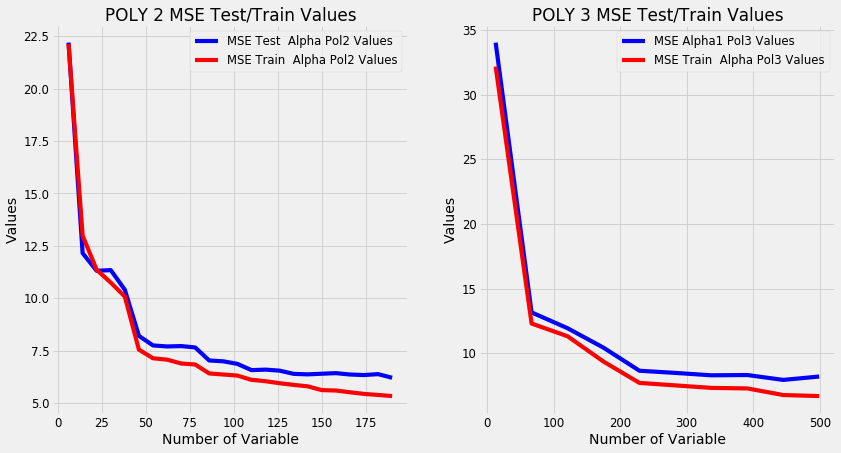

In [107]:
plt.figure(1, figsize = (15,8))

plt.subplot(1,2,1)
plt.plot(df_Lasso_alpha_pol2.number_of_variables,MSE_list_test_Lasso_alpha_pol2, label = 'MSE Test  Alpha Pol2 Values', color='blue', linewidth=5)
plt.plot(df_Lasso_alpha_pol2.number_of_variables,MSE_train_test_Lasso_alpha_pol2,label = 'MSE Train  Alpha Pol2 Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POLY 2 MSE Test/Train Values')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_Lasso_alpha_pol3.number_of_variables, MSE_list_test_Lasso_alpha_pol3,label = 'MSE Alpha1 Pol3 Values', color='blue', linewidth=5)
plt.plot(df_Lasso_alpha_pol3.number_of_variables, MSE_train_test_Lasso_alpha_pol3,label = 'MSE Train  Alpha Pol3 Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POLY 3 MSE Test/Train Values')
plt.legend()

plt.subplots_adjust()

plt.show()

#### <font color="green"> As we see, Poly 2 Model is breaking after 130th variable and train and test values loses direction in Poly 3 Model after 400th variable. 

# 10.6 Building ElasticNet Regression Models

In [108]:
from sklearn.linear_model import ElasticNet

In [109]:
def ElasticNet_model(df,pol, alpha):

    y = df['Life_Expectancy']
    Feature_list = df.columns[:500]
    
    MSE_list_test=[]
    R_list=[]
    number_of_variables=[]
    MAE_list=[]
    RMSE_list=[]
    MAPE_list=[]
    R_train_list=[]
    MSE_train_list=[]
    
    for variable in range(1,len(Feature_list)-1, pol**pol*2):
        selected_features =  Feature_list[:(-1*variable)]
        X_poly=df[selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
                
        model_poly = ElasticNet(alpha=alpha, l1_ratio=0.5)
        model_poly.fit(X_train, y_train)
        results = model_poly.fit(X_train, y_train)
               
        y_pred  = model_poly.predict(X_test)
        
        y_pred_train = model_poly.predict(X_train)
      
        MSE_list_test.append(mse(y_test, y_pred))
        
        MSE_train_list.append(mse(y_train, y_pred_train))
        R_list.append(model_poly.score(X_test, y_test))
        R_train_list.append(model_poly.score(X_train, y_train))
        number_of_variables.append(len(selected_features))
        MAE_list.append(mean_absolute_error(y_test, y_pred))
        
        RMSE_list.append(rmse(y_test, y_pred))
        
        MAPE_list.append(np.mean(np.abs((y_test-y_pred) / y_test)) * 100)
        
        
    model_means = list(zip(number_of_variables, R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list))
    
    poly_means = pd.DataFrame(model_means, columns= ['number_of_variables', 'R_list','R_train_list','MSE_list_test','MSE_train_list','MAE_list','RMSE_list','MAPE_list'])
    
    
    return poly_means, (y_pred,y_pred_train, X_train,y_train, X_test, y_test, model_poly, MSE_list_test,MSE_train_list)

In [110]:
%%time
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    df, _  = ElasticNet_model(df_poly_transform3,3,alpha)
    print(alpha, df.MSE_list_test.min())

1e-06 6.189172971760458
1e-05 6.1910653018375434
0.0001 6.203765174811868
0.001 6.204049520172481
0.01 6.222890992198783
1 6.156670570370171
10 6.246507707672501
100 7.259265804473017
1000 7.956916884911507
Wall time: 1min 6s


In [111]:
#The Best Model with minimum MSE_test Value on Alpha 10⁴ and polynomial 3 degree 
df_ElasticNet_alpha_pol3, degerler1_3 = ElasticNet_model(df_poly_transform3,3,0.00001)

In [112]:
%%time
for alpha in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    df, _  = ElasticNet_model(df_poly_transform2,2,alpha)
    print(alpha, df.MSE_list_test.min())

1e-06 6.203747239882031
1e-05 6.205410461333308
0.0001 6.2264995834486365
0.001 6.518870858685415
0.01 7.101450468440463
1 7.169485404748555
10 7.6526291455921625
100 7.868106438755214
1000 11.62535210105597
Wall time: 59.2 s


In [113]:
#The Best Model with minimum MSE_test Value on Alpha 10-⁵ and polynomial 2 degree 

df_ElasticNet_alpha_pol2, degerler1_2 = ElasticNet_model(df_poly_transform2,2,0.000001)

In [114]:
MSE_list_test_ElasticNet_alpha_pol2  = df_ElasticNet_alpha_pol2['MSE_list_test']
MSE_list_train_ElasticNet_alpha_pol2 = df_ElasticNet_alpha_pol2['MSE_train_list']
MSE_list_test_ElasticNet_alpha_pol3  = df_ElasticNet_alpha_pol3['MSE_list_test']
MSE_list_train_ElasticNet_alpha_pol3 = df_ElasticNet_alpha_pol3['MSE_train_list']

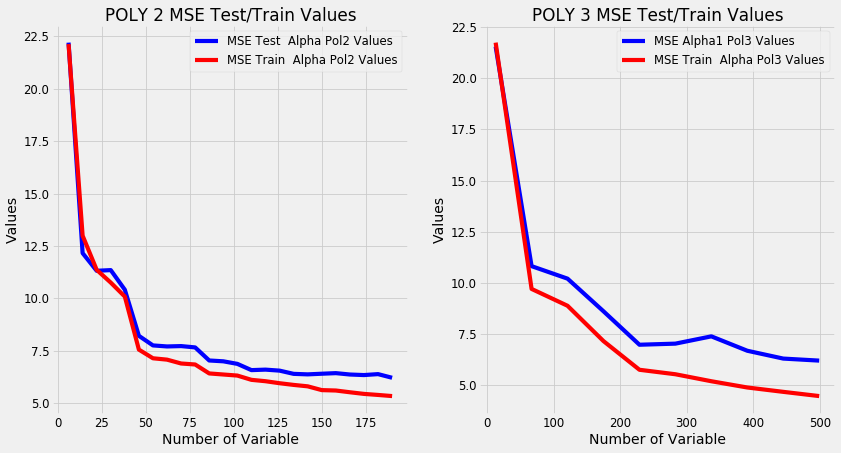

In [115]:
plt.figure(1, figsize = (15,8))

plt.subplot(1,2,1)
plt.plot(df_ElasticNet_alpha_pol2.number_of_variables,MSE_list_test_ElasticNet_alpha_pol2, label = 'MSE Test  Alpha Pol2 Values', color='blue', linewidth=5)
plt.plot(df_ElasticNet_alpha_pol2.number_of_variables,MSE_list_train_ElasticNet_alpha_pol2,label = 'MSE Train  Alpha Pol2 Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POLY 2 MSE Test/Train Values')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_ElasticNet_alpha_pol3.number_of_variables, MSE_list_test_ElasticNet_alpha_pol3,label = 'MSE Alpha1 Pol3 Values', color='blue', linewidth=5)
plt.plot(df_ElasticNet_alpha_pol3.number_of_variables, MSE_list_train_ElasticNet_alpha_pol3,label = 'MSE Train  Alpha Pol3 Values', color='red', linewidth=5)
plt.xlabel('Number of Variable')
plt.ylabel('Values')
plt.title('POLY 3 MSE Test/Train Values')
plt.legend()

plt.subplots_adjust()

plt.show()

In [116]:
df_ElasticNet_alpha_pol2.R_list.max()

0.9334785523920534

# <div align="center">  11. Evaluating the Model

#### Getting All Values of each Models in One Data Frame

In [117]:
objects =(df_pol1, df_pol2, df_pol3,
             df_Ridge_alpha_pol2, df_Ridge_alpha_pol3,
             df_Lasso_alpha_pol2, df_Lasso_alpha_pol3,
             df_ElasticNet_alpha_pol2, df_ElasticNet_alpha_pol3)

df_results = pd.DataFrame()
for df in objects:
    df_results= df_results.append(df.sort_values(by='MSE_list_test').head(1), ignore_index=True)
    

df_results['Model'] = ['Linear Regression (Polynomial 1)',
                           'Linear Regression (Polynomial 2)',
                           'Linear Regression (Polynomial 3)',
                           'Ridge Regression (Polynomial 2)',
                           'Ridge Regression (Polynomial 3)',
                           'Lasso Regression (Polynomial 2)',
                           'Lasso Regression (Polynomial 3)',                           
                           'ElasticNet Regression(Polynomial 2)',
                           'ElasticNet Regression(Polynomial 3)']
    
df_results.sort_values('MSE_list_test')

,MAE_list,MAPE_list,MSE_list_test,MSE_train_list,RMSE_list,R_list,R_train_list,feature_list,model_list,number_of_variables,Model
1,1.753252,2.614138,6.055676,4.899471,2.460828,0.935066,0.944217,NaN,NaN,190,Linear Regression (Polynomial 2)
3,1.753276,2.614171,6.055810,4.899471,2.460855,0.935065,0.944217,"Index(['Income_composition_of_resources^2', ...","Ridge(alpha=1e-06, copy_X=True, fit_intercept=...",190,Ridge Regression (Polynomial 2)
8,1.690680,2.533208,6.191065,4.456400,2.488185,0.933615,0.949262,NaN,NaN,499,ElasticNet Regression(Polynomial 3)
5,1.766733,2.639792,6.203610,5.329515,2.490705,0.933480,0.939321,NaN,NaN,190,Lasso Regression (Polynomial 2)
7,1.766733,2.639804,6.203747,5.329532,2.490732,0.933479,0.939320,NaN,NaN,190,ElasticNet Regression(Polynomial 2)
4,1.764527,2.649939,6.590307,4.166776,2.567159,0.929334,0.952559,"Index(['Income_composition_of_resources^3', ...","Ridge(alpha=1000, copy_X=True, fit_intercept=T...",391,Ridge Regression (Polynomial 3)
2,1.806150,2.687244,6.654642,5.002278,2.579659,0.928644,0.943046,NaN,NaN,229,Linear Regression (Polynomial 3)
6,2.022213,3.016675,7.930334,6.760101,2.816085,0.914965,0.923033,NaN,NaN,445,Lasso Regression (Polynomial 3)
0,2.682385,4.120825,13.429793,13.376066,3.664668,0.855995,0.847706,NaN,NaN,19,Linear Regression (Polynomial 1)


#### Comparing All Results of our Models in one BarPlot

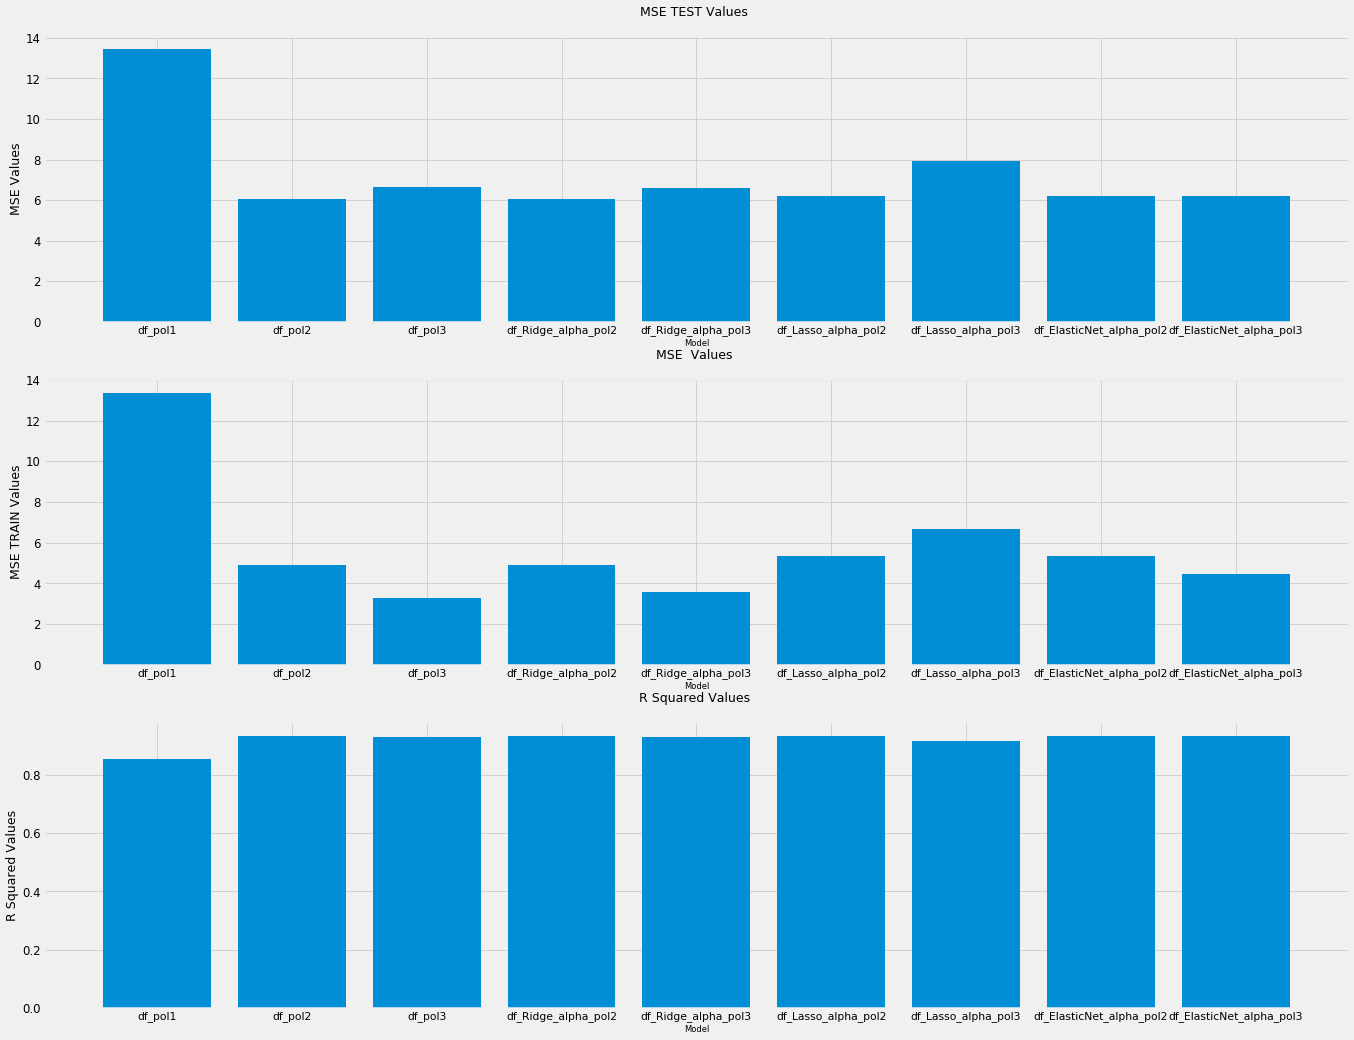

In [118]:
plt.figure(figsize=(25,20))

objects=('df_pol1', 'df_pol2', 'df_pol3',
           'df_Ridge_alpha_pol2', 'df_Ridge_alpha_pol3',
           'df_Lasso_alpha_pol2', 'df_Lasso_alpha_pol3',
           'df_ElasticNet_alpha_pol2', 'df_ElasticNet_alpha_pol3' )

y_pos = np.arange(len(objects)) 
performance  =[df_pol1.MSE_list_test.min() ,df_pol2.MSE_list_test.min(), df_pol3.MSE_list_test.min(),
               df_Ridge_alpha_pol2.MSE_list_test.min(),df_Ridge_alpha_pol3.MSE_list_test.min(),
               df_Lasso_alpha_pol2.MSE_list_test.min(), df_Lasso_alpha_pol3.MSE_list_test.min(),
               df_ElasticNet_alpha_pol2.MSE_list_test.min(), df_ElasticNet_alpha_pol3.MSE_list_test.min()]

performance2 =[df_pol1.MSE_train_list.min(), df_pol2.MSE_train_list.min(), df_pol3.MSE_train_list.min(),
               df_Ridge_alpha_pol2.MSE_train_list.min(),df_Ridge_alpha_pol3.MSE_train_list.min(),
               df_Lasso_alpha_pol2.MSE_train_list.min(), df_Lasso_alpha_pol3.MSE_train_list.min(),
               df_ElasticNet_alpha_pol2.MSE_train_list.min(), df_ElasticNet_alpha_pol3.MSE_train_list.min()]
               
               
performance3 = [df_pol1.R_list.max() ,df_pol2.R_list.max(), df_pol3.R_list.max(),
               df_Ridge_alpha_pol2.R_list.max(),df_Ridge_alpha_pol3.R_list.max(),
               df_Lasso_alpha_pol2.R_list.max(), df_Lasso_alpha_pol3.R_list.max(),
               df_ElasticNet_alpha_pol2.R_list.max(), df_ElasticNet_alpha_pol3.R_list.max()]

plt.subplot(311)
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,size=13)
plt.xlabel('Model',size=10)
plt.ylabel('MSE Values',size=15)
plt.title('MSE TEST Values \n', fontsize=15)


plt.subplots_adjust()
plt.subplot(312)
plt.bar(y_pos, performance2, align='center')
plt.xticks(y_pos, objects,size=13)
plt.xlabel('Model',size=10)
plt.ylabel('MSE TRAIN Values',size=15)
plt.title('MSE  Values \n', size = 15)

plt.subplot(313)
plt.bar(y_pos, performance3, align='center')
plt.xticks(y_pos, objects,size=13)
plt.title('R Squared Values \n', size = 15)
plt.xlabel('Model',size=10)
plt.ylabel('R Squared Values',size=15)

plt.subplots_adjust()
plt.show()

### <font color="green"> After searching different type of regression models, we have the minimum MSE and the better R² values from  Linear Regression and Ridge Regression on two polynomial degree. Polynomial degree does not affect values on different type of regression models. 


### <font color="green"> Low MSE values and highest R² came from two polynomial degree models. Applying other type of regressions with three polynomial degree only increased MSE Test values to a higher level. Therefore, I agree to choose the Ridge Regression with two polynomial degree.

### <font color="green">  **After selecting the best model of Ridge Regression with 2 polynomial degree on alpha 0.000001, here we will see the results of our model by applying coefficients on each variable as an example to check our model performance.**

# <div align="center">  12. Predicting with the Best Model

#### An Example from a Rondom Row to Check The Model Performance

In [119]:
#As we see on the graph of this model, best performance is starting after 125th variable.
#Thus, I selected the first 126 variables from our model.

df_Ridge_alpha_pol2[df_Ridge_alpha_pol2['number_of_variables']== 126 ]

,number_of_variables,R_list,R_train_list,MSE_list_test,MSE_train_list,MAE_list,RMSE_list,MAPE_list,model_list,feature_list
8,126,0.931727,0.936183,6.367121,5.605142,1.790221,2.523316,2.66209,"Ridge(alpha=1e-06, copy_X=True, fit_intercept=...","Index(['Income_composition_of_resources^2', ..."


In [120]:
# A rondom row[5] of our data set to find values for each columns as an example:

Selected_Model = df_Ridge_alpha_pol2.iloc[5].model_list

In [121]:
#Here are the coeficiants from our model. 

Selected_Model.coef_

array([ 3.75187144e+01, -7.80713024e-01,  1.84337555e-02,  9.92773589e-03,
       -1.99181100e+01,  1.10018981e-01, -2.26000781e+02,  8.48318827e-03,
       -1.69259354e-04, -5.77553809e-02, -1.05146667e-03,  4.38689282e-03,
        7.84064121e-04, -2.32857179e-01,  1.44436593e-04, -4.69092634e-03,
        3.94814794e-02, -8.12010714e+01, -3.71267830e-03, -1.88599793e-03,
        8.50338075e-05,  1.08801752e-04,  1.49178041e-02, -8.82197424e-04,
       -1.25564246e-04, -1.29840972e-02,  6.35652502e-06,  2.22600425e-06,
       -2.83738651e-02, -4.53997994e-04, -3.22252178e-06, -2.66706454e-03,
        5.83164962e-03,  3.72089537e+01,  6.13189313e-02, -1.81490463e-02,
        1.33875436e-01,  6.15444165e-02, -7.76220264e-04,  8.43036011e-04,
        4.23035937e-03, -1.61722710e-05,  3.12286283e-02, -5.36401227e-04,
        1.26367189e+00, -2.74573286e-01,  2.96818655e-07, -4.11550645e-03,
        6.08885603e-04,  4.59366002e-05, -6.57238132e-03,  4.41489895e-04,
       -2.37595474e-04,  

In [122]:
#Switching our values to doctionary for the further step.
LifeExpectancyData_num.iloc[5].to_dict()

{'Year': 2010.0,
 'Life_Expectancy': 58.8,
 'Adult_Mortality': 279.0,
 'infant_deaths': 74.0,
 'Alcohol': 0.01,
 'percentage_expenditure': 79.67936736,
 'Hepatitis_B': 66.0,
 'Measles': 1989.0,
 'BMI': 16.7,
 'under_five_deaths': 102.0,
 'Polio': 66.0,
 'Total_Expenditure': 9.2,
 'Diphtheria': 66.0,
 'HIV/AIDS': 0.1,
 'GDP': 553.32894,
 'thinness_1_19_years': 16.6,
 'thinness_5_9_years': 6.9,
 'Income_composition_of_resources': 0.44799999999999995,
 'Schooling': 9.2}

In [123]:
#Creating a dictionary to have values for each variables.

dictionary = {'Year': 2010.0,
 'Adult_Mortality': 279.0,
 'infant_deaths': 74.0,
 'Alcohol': 0.01,
 'percentage_expenditure': 79.67936736,
 'Hepatitis_B': 66.0,
 'Measles': 1989.0,
 'BMI': 16.7,
 'under_five_deaths': 102.0,
 'Polio': 66.0,
 'Total_Expenditure': 9.2,
 'Diphtheria': 66.0,
 'HIV/AIDS': 0.1,
 'GDP': 553.32894,
 'thinness_1_19_years': 16.6,
 'thinness_5_9_years': 6.9,
 'Income_composition_of_resources': 0.45,
 'Schooling': 9.2}

In [124]:
Example = np.array(list(dictionary.values())).reshape(1,-1)
poly = PolynomialFeatures(2)
df = LifeExpectancyData_num.drop('Life_Expectancy', axis=1)
poly.fit_transform(df)

df_example = pd.DataFrame(poly.transform(Example), columns= poly.get_feature_names(df.columns))

df_Ridge_alpha_pol2, degerler1_2 = Ridge_model(df_poly_transform2,2,0.000001)
selected_fetures = df_Ridge_alpha_pol2.iloc[5]['feature_list']
selected_model = df_Ridge_alpha_pol2.iloc[5]['model_list']

Selected_Model.predict(df_example[selected_fetures]) 

array([61.14846731])

# <div align="center">  13. Conclusions

### <font color="green">  We can see that having values as following 'Year': 2010,  'Adult_Mortality': 279.0,  'infant_deaths': 74.0, 'Alcohol': 0.01, 'percentage_expenditure': 79.67936736, 'Hepatitis_B': 66.0, 'Measles': 1989.0, 'BMI': 16.7, 'under_five_deaths': 102.0, 'Polio': 66.0, 'Total_Expenditure': 9.2, 'Diphtheria': 66.0, 'HIV/AIDS': 0.1, 'GDP': 553.32894, 'thinness_1_19_years': 16.6, 'thinness_5_9_years': 6.9, 'Income_composition_of_resources': 0.45, 'Schooling': 9.2, gives the result of Life Expectancy as '61'. 
 
### <font color="green">  The original value of Life Expectancy was 58.8 in 2010.  MSE Test value is 6.367 with 2.52 of RMSE value. Simply 61 minus 2.52 gives results as around 58 which is the 99% of the real value of Life Expectancy.
    
### <font color="green">  Regression models is luckily helping us to predict our dependent variabl0 with using many parameters. In order to have an accurate result, we need to check as many as regression models. Having the lowest MSE and highest R squared values are helping us on our way. 
 